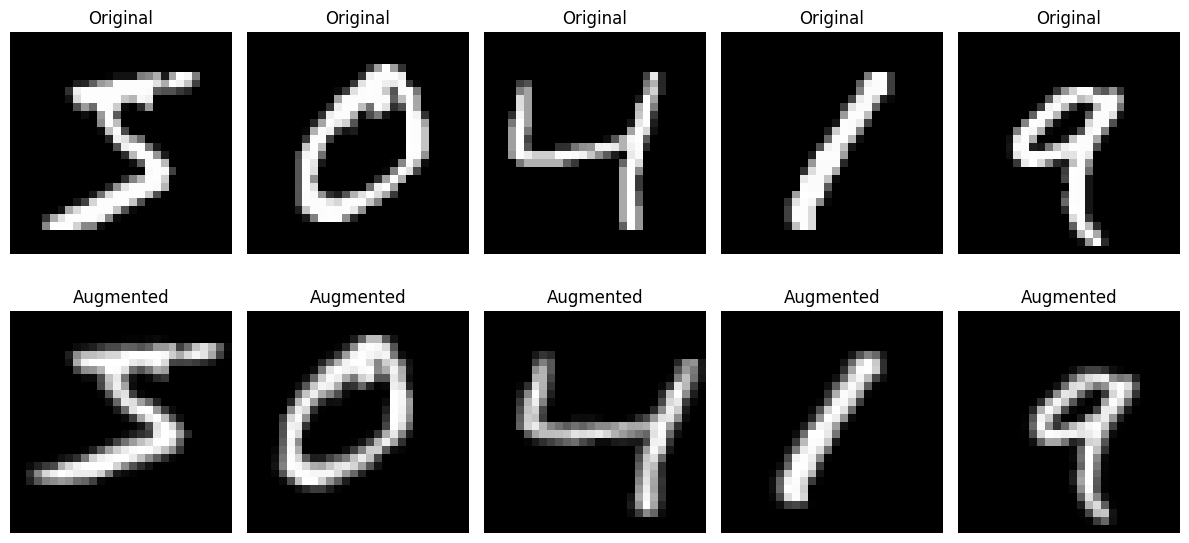

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
augmented_images = []
augmented_labels = []
for x, y in zip(x_train, y_train):
    x = tf.expand_dims(x, 0)
    augmented_iterator = datagen.flow(x, batch_size=1)
    augmented_image = next(augmented_iterator)[0]
    augmented_images.append(augmented_image)
    augmented_labels.append(y)
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < 5:
        ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
        ax.set_title('Original')
    else:
        ax.imshow(augmented_images[i - 5].reshape(28, 28), cmap='gray')
        ax.set_title('Augmented')
    ax.axis('off')
plt.tight_layout()
plt.show()
